In [1]:
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


Using TensorFlow backend.


In [2]:
os.chdir("/home/rk/Desktop/kaggle/all")

In [3]:
trainSample=pd.read_csv("train.csv")

testSample=pd.read_csv("test.csv")

titanic =  pd.concat(objs=[trainSample,testSample],axis=0).reset_index(drop=True)



/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


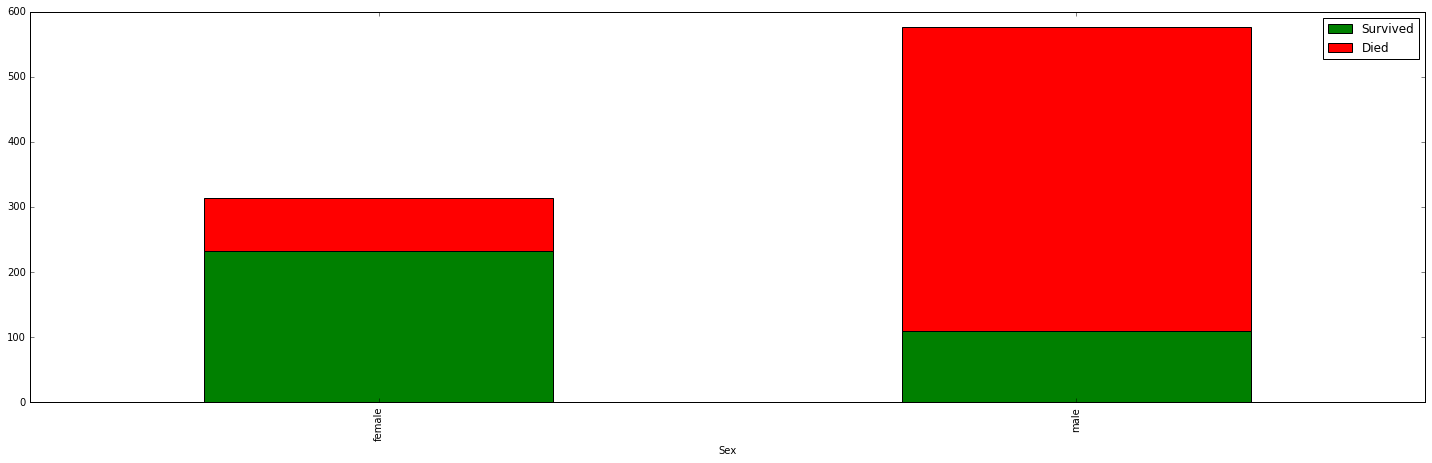

In [4]:
trainSample['Died']=1-trainSample['Survived']
trainSample.groupby('Sex').agg('sum')[['Survived','Died']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True, colors=['g', 'r'])


In [5]:

missing_val=pd.DataFrame(titanic.isnull().sum())
missing_val=missing_val.reset_index()
missing_val=missing_val.rename(columns={'indrex':'variables',0:'missing_percentage'})
rmissing_val['missing_percentage']=((missing_val['missing_percentage'])/len(titanic))*100
missing_val

,index,missing_percentage
0,Age,20.091673
1,Cabin,77.463713
2,Embarked,0.152788
3,Fare,0.076394
4,Name,0.000000
5,Parch,0.000000
6,PassengerId,0.000000
7,Pclass,0.000000
8,Sex,0.000000
9,SibSp,0.000000


In [6]:
titanic=titanic[['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived']]

In [7]:
titanic=titanic.drop(['Cabin'],axis=1)

In [8]:
#Creating new variable for 'major','sir'...so that we will get more information about our dataset.there by we can increase our model accuracy 
#me:nice idea though :)

titles = set()
for name in titanic['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())


In [9]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}


In [11]:
  # we extract the title from each name
titanic['Title'] = titanic['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
titanic['Title'] = titanic.Title.map(Title_Dictionary)
  #  status('Title')
   # return combined

In [12]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived', 'Title'],
      dtype='object')

In [13]:
list=[]

for i in range(0,titanic.shape[1]):
    if(titanic.iloc[:,i].dtypes == 'object'):
        
        titanic.iloc[:,i]=pd.Categorical(titanic.iloc[:,i])
        titanic.iloc[:,i]=titanic.iloc[:,i].cat.codes
        list.append(titanic.columns[i])
    
    

In [14]:
for i in range(0,titanic.shape[1]):
    titanic.iloc[:,i]=titanic.iloc[:,i].replace(-1,np.nan)

In [ ]:
titanic=pd.DataFrame(KNN(k=3).complete(titanic),columns=titanic.columns)

In [16]:
for i in list:
    titanic.loc[:,i]=titanic.loc[:,i].round()
    titanic.loc[:,i]=titanic.loc[:,i].astype('object')

In [17]:
cnames=["PassengerId","Pclass","Age","SibSp","Parch","Fare"]
#save categorical values
cat_names=["Name","Sex","Ticket","Embarked","Title"]

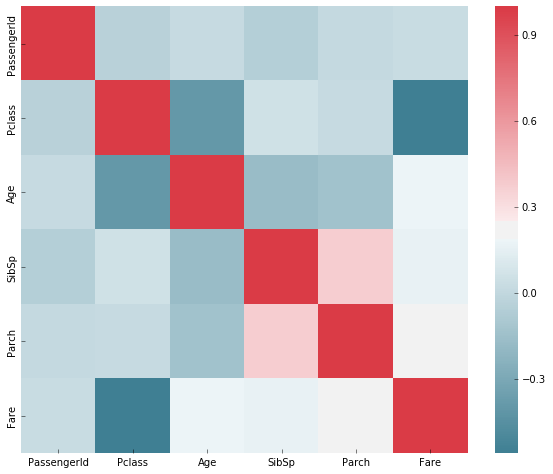

In [18]:
#feature selection
dff_corr=titanic.loc[:,cnames]

f,ax=plt.subplots(figsize=(10,8))

corr=dff_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(titanic['Survived'], titanic[i]))
    print(p)

In [20]:
titanic=titanic.drop(["Name"],axis=1)


In [ ]:
#normality check.can check normality of each variable 
%matplotlib inline
plt.hist(titanic['Age'],bins='auto')

In [22]:
#im not sure about this line try standardization also :)
for i in cnames:
    titanic[i]=(titanic[i]-np.min(titanic[i]))/(np.max(titanic[i])-np.min(titanic[i]))

In [ ]:
%matplotlib inline
plt.hist(titanic['Age'],bins='auto')

In [24]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
for i in range(890,892):
    print(titanic['Survived'].iloc[i])r

In [26]:
#model developement


#replace target categories with Yes or No
titanic['Survived'] = titanic['Survived'].replace(0, 'No')
titanic['Survived'] = titanic['Survived'].replace(1, 'Yes')

In [27]:
titanic=titanic.drop(["PassengerId"],axis=1)

In [ ]:
#train=titanic.head(892)
#test=titanic.tail(417)
titanic.dtypes

In [28]:
titanic.to_csv("abc.csv",index=False)


In [ ]:
titanic.columns

In [46]:
titanic=titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked','Title','Survived']]

In [47]:
train=titanic.iloc[0:892,]


train['Survived'].iloc[891]='No'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
test=titanic.iloc[891:1309,]
test.describe()

In [49]:
train.tail(10)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Survived
882,1.0,0,0.273456,0.000,0.000000,697,0.020527,2,1,No
883,0.5,1,0.348616,0.000,0.000000,774,0.020495,2,2,No
884,1.0,1,0.311036,0.000,0.000000,891,0.013761,2,2,No
885,1.0,0,0.486409,0.000,0.555556,659,0.056848,1,3,No
886,0.5,1,0.336089,0.000,0.000000,130,0.025374,2,4,No
887,0.0,0,0.235876,0.000,0.000000,18,0.058556,2,1,Yes
888,1.0,0,0.351675,0.125,0.222222,923,0.045771,2,1,No
889,0.0,1,0.323563,0.000,0.000000,11,0.058556,0,2,Yes
890,1.0,1,0.398722,0.000,0.000000,642,0.015127,1,2,No
891,1.0,1,0.430039,0.000,0.000000,376,0.015282,1,2,No


In [50]:
#Divide data into train and test



X = train.values[:,0:9]
Y = train.values[:,9]

Xt = test.values[:,0:9]
#Yt = test.values[:,8]

#X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)
#X_train, X_test, y_train, y_test = train_test_split( X, Y)


In [51]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 20).fit(X,Y)

In [ ]:
RF_Predictions = RF_model.predict(Xt)
ans=pd.DataFrame({'PassengerId':range(892,892+len(RF_Predictions)),'Survived':RF_Predictions})
ans

In [53]:
#ans=ans["Survived"].replace("Yes",1)
#ans=ans["Survived"].replace("No",0)
ans['Survived'] = ans['Survived'].map({'Yes': 1, 'No': 0})
ans.to_csv("submission.csv",index=False)


In [566]:
#ans.to_csv("newsubmission.csv",index=False)

In [263]:

#Since we don't have test result we cant't find the accuracy of the model.so keep calm ,upload the result to kaggle :)

#CM = pd.crosstab(y_test, RF_Predictions)

#let us save TP, TN, FP, FN
#TN = CM.iloc[0,0]
#FN = CM.iloc[1,0]
#TP = CM.iloc[1,1]
#FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
#((TP+TN)*100)/(TP+TN+FP+FN)


84.35754189944134